In [ ]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline

### Parse logfiles for next N subjects, summer, 2015
compare to "pandify_multi_poly_probe_data"

In [ ]:
subjects = {}

probe_images_path = '/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/data/summer2018/'

# subjects['ltd'] = {}
# subjects['ltd']['sourcefile'] = probe_images_path+'ltd_2018_Jun_16_1126.log'

subjects['gsy'] = {}
subjects['gsy']['sourcefile'] = probe_images_path+'GSY_2018_Jul_23_1339.log'


# subjects['CP'] = {}
# subjects['CP']['sourcefile'] = probe_images_path+'data/CP_2014_Nov_14_1513.log'

save_path = '/home/tnaselar/FAST/scratch/'

max_images_per_exp = 4


imagery_marker = '_img_'
perception_marker = '_pcp_'

subject_table = pd.DataFrame(subjects)

number_of_lines_in_chunk = 3

In [ ]:
subject_table

In [ ]:
def starts_a_response_chunk(x):
    if 'New trial' in x:
        return True
    else:
        return False

def get_probe_number(new_line):
    return '_'.join(re.search('_probe\((.*?)\).png', new_line).group(1).split(','))
#     dx = new_line.index('_probe(')
#     if new_line[dx-2].isdigit():
#         return int(new_line[dx-2:dx])
#     else:
#         return int(new_line[dx-1])
    
# def get_repetition(new_line):
#     return int(new_line[new_line.index('rep=')+4])

def get_state(new_line):
    dx = new_line.index('probe(')
    state = new_line[dx-4:dx-1]
    if state:
        return state
    else:
        raise Exception('you are not at the start of a new trial')
#     if 'just-probes' in new_line:
#         return 'img'
#     elif 'probes-with-im' in new_line:
#         return 'pcp'
#     else:
        

def get_time_stamp(new_line):
    return float(new_line[0:new_line.index('\t')])

def get_response(new_line):
    try:
        return int(new_line[new_line.index('Keypress')+10])
    except:
        print('subject did not respond, returning None')
        return None
        
def skip_a_line(all_lines):
    return all_lines.pop(0)

def get_image(new_line):
    return re.search('poly_probes/probes/(.*?_\d\d)', new_line).group(1)
#     dx = new_line.index('finalprobeset')
#     return new_line[dx:(dx+15)]

In [ ]:
f = '/home/tnaselar/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(1,11).png'
snippet = '27.9541	DATA	Keypress: 2'
print get_time_stamp(snippet)
print 'state: %s' %(get_state(f))
print get_response(snippet)
print get_image(f)

In [ ]:
data_dict = {'subj': [], 'image': [], 'probe': [], 'state': [], 'image_on': [], 'resp_on': [], 'response': []}
for subj in subjects.keys():
    print subj    
    all_lines = open(subjects[subj]['sourcefile'], 'r').readlines()
    while all_lines:
        new_line = all_lines.pop(0)
        if starts_a_response_chunk(new_line):
            data_dict['subj'].append(subj)
            new_line = all_lines.pop(0)
            if new_line.find('WARNING') > 0:
                _ = skip_a_line(all_lines)
            if new_line.find('Keypress') > 0:
                _= skip_a_line(all_lines)
            new_line = all_lines.pop(0)
            data_dict['probe'].append(get_probe_number(new_line))
            data_dict['state'].append(get_state(new_line))  
            data_dict['image'].append(get_image(new_line))
            data_dict['image_on'].append(get_time_stamp(all_lines.pop(0)))
            new_line = all_lines.pop(0)
            data_dict['resp_on'].append(get_time_stamp(new_line))
            data_dict['response'].append(get_response(new_line))
            


probe_exp = pd.DataFrame(data_dict)



In [22]:
probe_exp.head()

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,215.1759,10_19_11,219.2427,NaN,img,gsy
1,candle_01,229.9761,10,231.3763,1.0,img,gsy
2,candle_01,231.4428,11,232.5763,1.0,img,gsy
3,candle_01,232.6428,0_1_10,233.9763,1.0,img,gsy
4,candle_01,234.0429,34_43_35_44,238.2430,2.0,img,gsy


In [23]:
probe_exp.dtypes

image        object
image_on    float64
probe        object
resp_on     float64
response    float64
state        object
subj         object
dtype: object

In [24]:
probe_exp.describe()

,image_on,resp_on,response
count,1380.000000,1380.000000,1379.00000
mean,4440.619738,4447.286832,2.66715
std,3075.427969,3077.128046,1.53579
min,215.175900,219.242700,1.00000
25%,1990.291700,1997.875325,1.00000
50%,3153.514250,3158.314400,2.00000
75%,7484.623025,7525.707200,3.00000
max,10004.854800,10007.855000,8.00000


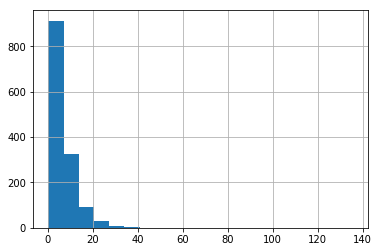

In [25]:
diff = probe_exp.resp_on - probe_exp.image_on

diff.hist(bins=20)

In [26]:
diff.describe()

count    1380.000000
mean        6.667094
std         7.884963
min         0.266700
25%         2.066800
50%         4.733500
75%         8.467000
max       135.535800
dtype: float64

In [27]:
probe_exp[-3:]

,image,image_on,probe,resp_on,response,state,subj
1377,peaches_05,9964.5874,19_20_29,9998.9215,7.0,pcp,gsy
1378,peaches_05,9998.9881,41_42,10004.7883,2.0,pcp,gsy
1379,peaches_05,10004.8548,28_37_29_38,10007.8550,3.0,pcp,gsy


In [28]:
probe_exp[:3]

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,215.1759,10_19_11,219.2427,NaN,img,gsy
1,candle_01,229.9761,10,231.3763,1.0,img,gsy
2,candle_01,231.4428,11,232.5763,1.0,img,gsy


In [29]:
(10804-229)/60.


176.25

In [30]:
print probe_exp.loc[1]
print type(probe_exp.loc[1])


image       candle_01
image_on      229.976
probe              10
resp_on       231.376
response            1
state             img
subj              gsy
Name: 1, dtype: object
<class 'pandas.core.series.Series'>


In [31]:
probe_exp.loc[:, ['probe', 'response']].head()

,probe,response
0,10_19_11,NaN
1,10,1.0
2,11,1.0
3,0_1_10,1.0
4,34_43_35_44,2.0


In [32]:
probe_exp.iloc[0]

image       candle_01
image_on      215.176
probe        10_19_11
resp_on       219.243
response          NaN
state             img
subj              gsy
Name: 0, dtype: object

In [33]:
probe_exp.iloc[0:2, 1:3]

,image_on,probe
0,215.1759,10_19_11
1,229.9761,10


In [34]:
probe_exp[probe_exp['probe']=='40_41']


,image,image_on,probe,resp_on,response,state,subj
191,candle_01,1201.3270,40_41,1210.3939,1.0,img,gsy
623,candle_01,2762.0901,40_41,2762.8236,1.0,pcp,gsy
943,peaches_05,6236.9869,40_41,6250.2539,3.0,img,gsy
1251,peaches_05,9216.6401,40_41,9220.1072,4.0,pcp,gsy


In [35]:
probe_exp[probe_exp.probe.isin(['40','41','40_41'])]

,image,image_on,probe,resp_on,response,state,subj
29,candle_01,347.2449,40,352.7118,1.0,img,gsy
171,candle_01,1103.6586,41,1106.7921,1.0,img,gsy
191,candle_01,1201.3270,40_41,1210.3939,1.0,img,gsy
412,candle_01,2196.2125,41,2197.6793,1.0,pcp,gsy
433,candle_01,2256.2137,40,2258.3472,1.0,pcp,gsy
623,candle_01,2762.0901,40_41,2762.8236,1.0,pcp,gsy
738,peaches_05,3957.4793,41,3967.9463,2.0,img,gsy
785,peaches_05,4425.2880,40,4430.8215,3.0,img,gsy
943,peaches_05,6236.9869,40_41,6250.2539,3.0,img,gsy
1231,peaches_05,9069.1706,40,9073.1708,4.0,pcp,gsy


In [ ]:
ltd = probe_exp[probe_exp.subj=='ltd']
ltd.sort(columns='probe')[0:6]

In [ ]:
probe_exp.to_pickle(os.path.join(save_path+'multi_poly_probe_data_test.pkl'))